***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

%matplotlib inline
sns.set(style = 'white')

# Change default pandas display options
pd.options.display.float_format = '{:,.2f}'.format

<div class="alert alert-block alert-info">
<b>Match the file name pattern with glob</b>
</div>

In [2]:
Happiness = sorted(glob('World Happiness Report - *.csv'))

Happiness

['World Happiness Report - 2018.csv', 'World Happiness Report - 2019.csv']

<div class="alert alert-block alert-info">
<b>Load the data concatenated</b>
</div>

In [3]:
# Concatenate both dataframes 
df = pd.concat((pd.read_csv(file).assign(filename = file) for file in Happiness), ignore_index = False)

# Replace the name to just a number to be possible to convert the variable
df['filename'].replace({'World Happiness Report - 2018.csv': '2018', 
                        'World Happiness Report - 2019.csv': '2019'}, inplace = True)

# Convert object to integer
df['date'] = df['filename'].astype(str).astype(int)

# Convert integer to datetime
df['date'] = pd.to_datetime(df['date'], format = '%Y')

df.set_index('date', inplace = True)
df.sort_index(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 2018-01-01 to 2019-01-01
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   filename                      312 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 26.8+ KB


<div class="alert alert-block alert-info">
<b>Pivot table sorted by generosity</b>
</div>

In [4]:
pivot_all = pd.pivot_table(df, index =  [ df.index.year, 'Country or region', 'Overall rank'], 
                               values = ['Score', 'GDP per capita','Healthy life expectancy', 
                                         'Social support', 'Freedom to make life choices', 
                                         'Generosity', 'Perceptions of corruption'])

pivot_all = pivot_all[['Score', 'GDP per capita','Healthy life expectancy', 
                               'Social support', 'Freedom to make life choices', 
                               'Generosity', 'Perceptions of corruption']]

pivot_all = pivot_all.sort_values(by = ['Generosity'], ascending = False)

pivot_all

Score  GDP per capita  \
date Country or region Overall rank                          
2018 Myanmar           130            4.31            0.68   
2019 Myanmar           131            4.36            0.71   
     Indonesia         92             5.19            0.93   
2018 Indonesia         96             5.09            0.90   
2019 Haiti             147            3.60            0.32   
...                                    ...             ...   
2018 Morocco           85             5.25            0.78   
     Lithuania         50             5.95            1.20   
2019 Botswana          148            3.49            1.04   
2018 Greece            79             5.36            1.15   
2019 Greece            82             5.29            1.18   

                                     Healthy life expectancy  Social support  \
date Country or region Overall rank                                            
2018 Myanmar           130                              0.43            1.17   
2019 Myanmar           131                              0.56            1.18   
     Indonesia         92                               0.66            1.20   
2018 Indonesia         96                               0.52            1.22   
2019 Haiti             147                              0.45            0.69   
...                                                      ...             ...   
2018 Morocco           85                               0.67            0.80   
     Lithuania         50                               0.72            1.53   
2019 Botswana          148                              0.54            1.15   
2018 Greece            79                               0.88            1.20   
2019 Greece            82                               1.00            1.16   

                                     Freedom to make life choices  Generosity  \
date Country or region Overall rank                                             
2018 Myanmar           130                                   0.58        0.60   
2019 Myanmar           131                                   0.53        0.57   
     Indonesia         92                                    0.49        0.50   
2018 Indonesia         96                                    0.54        0.48   
2019 Haiti             147                                   0.03        0.42   
...                                                           ...         ...   
2018 Morocco           85                                    0.46        0.03   
     Lithuania         50                                    0.35        0.03   
2019 Botswana          148                                   0.46        0.03   
2018 Greece            79                                    0.13        0.00   
2019 Greece            82                                    0.07        0.00   

                                     Perceptions of corruption  
date Country or region Overall rank                             
2018 Myanmar           130                                0.18  
2019 Myanmar           131                                0.17  
     Indonesia         92                                 0.03  
2018 Indonesia         96                                 0.02  
2019 Haiti             147                                0.11  
...                                                        ...  
2018 Morocco           85                                 0.07  
     Lithuania         50                                 0.01  
2019 Botswana          148                                0.10  
2018 Greece            79                                 0.04  
2019 Greece            82                                 0.03  

[312 rows x 7 columns]

<div class="alert alert-block alert-info">
<b>Correlation matrix using data of 2018 and 2019</b>
</div>

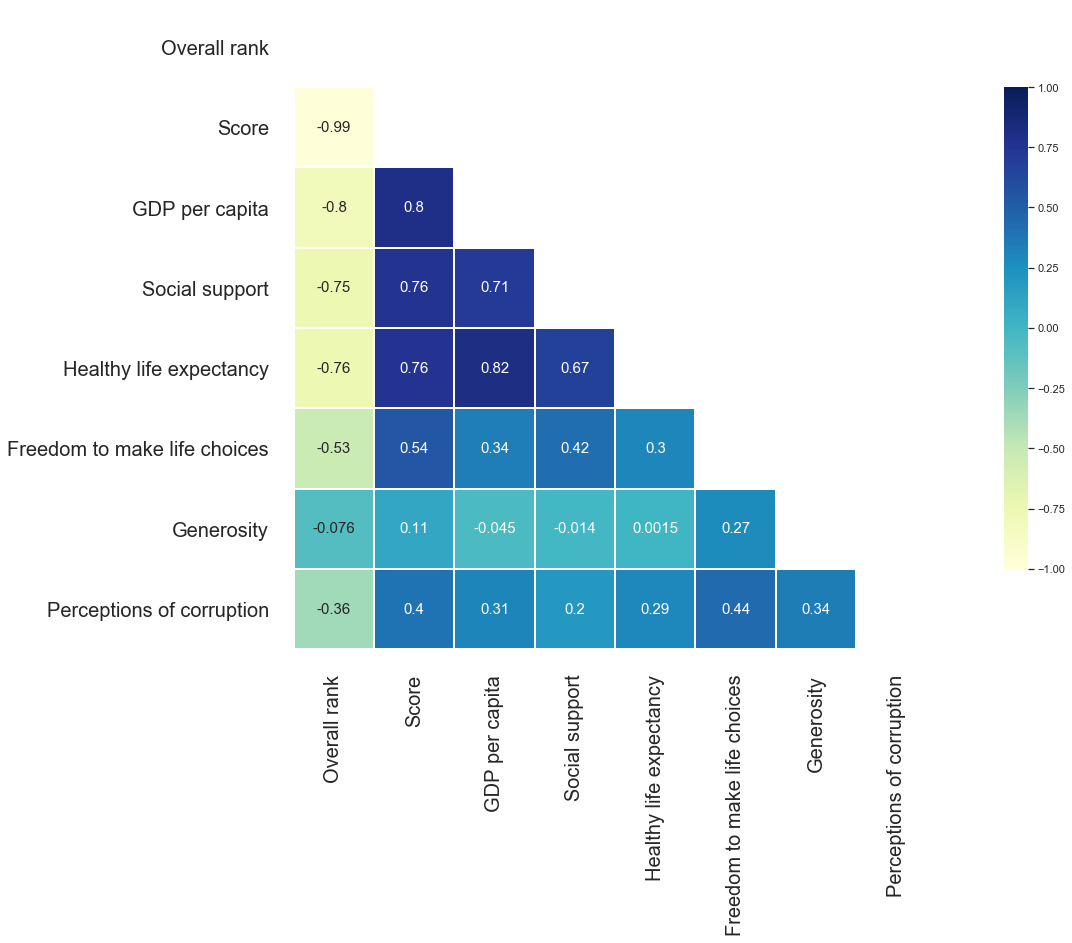

In [5]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

corr = df.corr()

# To hide part of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))

ax = sns.heatmap(corr, mask = mask, annot = True, cmap = 'YlGnBu', vmax = 1, center = 0, vmin = -1,
                 square = True, linewidths = 1, linecolor = 'white', cbar_kws = {'shrink': 0.75})

ax.tick_params(labelsize = 20, length = 10)

plt.show()

<div class="alert alert-block alert-info">
<b>Load the data of 2019</b>
</div>

In [6]:
df_2019 = df[df.index.year == 2019]

<div class="alert alert-block alert-info">
<b>Barplot of score by contry or region in 2019</b>
</div>

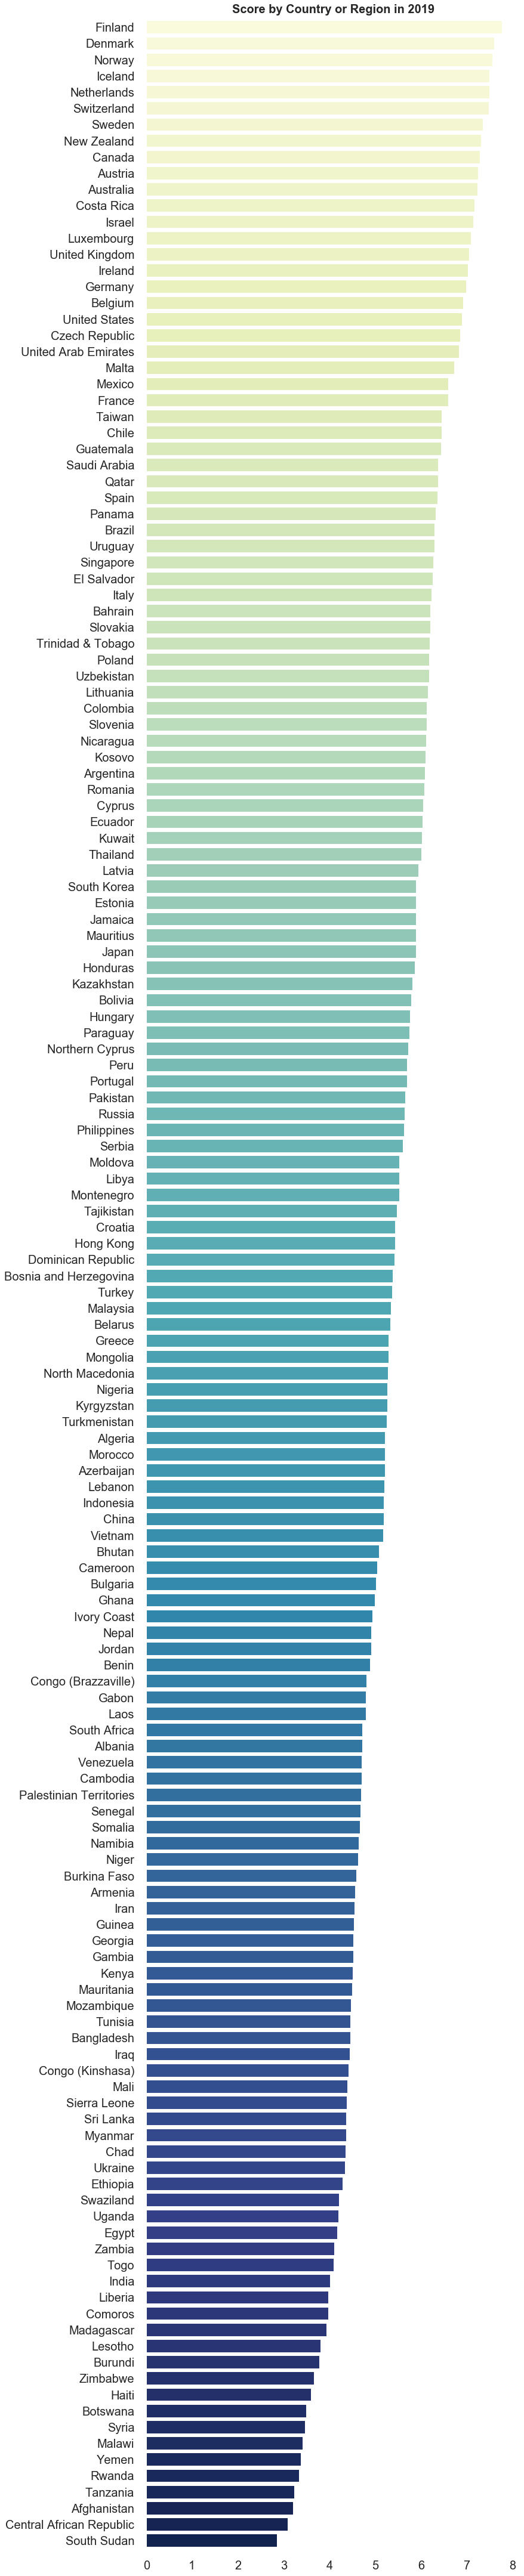

In [7]:
plt.figure(figsize = (10, 60))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 20)

ax = sns.barplot(x = df_2019['Score'], y = df_2019['Country or region'],  
                 orient = 'h', palette = 'YlGnBu')

ax.set_title('Score by Country or Region in 2019', weight = 'bold', fontsize = 20, pad = 10)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize = 20, length = 10)
sns.despine(left = True, bottom = True)
plt.show()